In [2]:
!pip install silence_tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for silence_tensorflow: filename=silence_tensorflow-1.2.1-py3-none-any.whl size=4466 sha256=70f22f7583a0e19342366f183c41189bd6fe257338cac30ee963ef76e3ad16f4
  Stored in directory: c:\users\smhrd\appdata\local\pip\cache\wheels\d6\ec\29\1ed23ae577b310931b534a6da0aa3adc169deef9a8ef10bd26
  Created wheel for support_developer: filename=support_developer-1.0.4-py3-none-any.whl size=5046 sha256=b1562bde01e15963bc38d29be23420e7438dce2e6a0872bc122ac0704c618d12
  Stored in directory: c:\users\smhrd\appdata\local\pip\cache\wheels\b9\b1\c9\a70fdc366ae08ae512afe269a450fd6a3e07e8c9fd48810531
Successfully built silence_tensorflow support_developer


In [4]:
!pip install db

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 172.0/172.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3875 sha256=60865dee70c8a399d62d8db606ef0e7549753aa8d196412a7a233deb8e8a8240
  Stored in directory: c:\users\smhrd\appdata\local\pip\cache\wheels\85\9b\62\ebd5df18a3e9d5ead2b27c11d493f87aedc9d5e3bb0539010c
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31664 sha256=018637c4d6c003fbbe24a4f109007afc755289dc20b3e71a7d84f9318b673e35
  Stored in directory: c:\users\smhrd\appdata\local\pip\cache\wheels\56\3b\ce\83091ca1e408b04d35d8df207a364f524c34807cd0a5006ecb
Successfully built db antiorm


In [7]:
import sys
import os

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

import warnings
warnings.filterwarnings(action='ignore')
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import tensorflow as tf
import joblib
import pickle

In [8]:
weekly_data = pd.read_csv('data/TB_PYEONGLIM_WEEKLY.csv', encoding='utf-8')
monthly_data = pd.read_csv('data/TB_PYEONGLIM_MONTHLY.csv', encoding='utf-8')

In [28]:
monthly_data['water_depth'].describe()

count    118.000000
mean       1.101695
std        0.684253
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        6.000000
Name: water_depth, dtype: float64

In [12]:
monthly_data.corr()

,wq_cloa,avg_lmac,avg_pa,avg_ps,avg_pv,avg_rhm,avg_ta,avg_tca,avg_td,avg_ts,...,wq_ph,wq_phenol,wq_pop,wq_ss,wq_tcoli,wq_temp,wq_tn,wq_toc,wq_tp,wq_trans
wq_cloa,1.000000,0.102806,-0.450456,-0.454482,0.528435,0.300297,0.494437,-0.011056,0.506413,0.484642,...,0.460982,-0.050712,0.158849,0.520290,0.249901,0.512750,0.015430,0.462670,0.190717,-0.262597
avg_lmac,0.102806,1.000000,-0.150421,-0.146696,0.039486,0.202500,-0.014511,0.570942,0.042095,-0.052385,...,-0.011969,-0.066009,0.160555,-0.069059,-0.091986,0.021639,0.210940,0.317488,0.158741,0.292786
avg_pa,-0.450456,-0.150421,1.000000,0.999857,-0.808057,-0.487451,-0.833089,-0.204853,-0.840699,-0.810019,...,-0.486994,0.058070,-0.134894,-0.304013,-0.119028,-0.741875,0.026287,-0.418388,-0.246587,0.084315
avg_ps,-0.454482,-0.146696,0.999857,1.000000,-0.815390,-0.488767,-0.841738,-0.200021,-0.848475,-0.818859,...,-0.490268,0.055678,-0.137416,-0.305863,-0.121892,-0.750989,0.027061,-0.419893,-0.249911,0.084859
avg_pv,0.528435,0.039486,-0.808057,-0.815390,1.000000,0.585707,0.943676,0.053143,0.967685,0.914462,...,0.503170,0.048986,0.149427,0.399050,0.234170,0.887930,-0.021986,0.415432,0.330060,-0.166628
avg_rhm,0.300297,0.202500,-0.487451,-0.488767,0.585707,1.000000,0.435009,0.117461,0.630162,0.382421,...,0.120227,-0.021732,0.044807,0.393251,0.356515,0.429689,-0.026944,0.266877,0.034175,-0.282396
avg_ta,0.494437,-0.014511,-0.833089,-0.841738,0.943676,0.435009,1.000000,0.001039,0.972383,0.982376,...,0.508551,0.024460,0.183718,0.307894,0.196752,0.934138,-0.036940,0.391013,0.345889,-0.107243
avg_tca,-0.011056,0.570942,-0.204853,-0.200021,0.053143,0.117461,0.001039,1.000000,0.033550,-0.043542,...,0.081275,0.152000,-0.040972,-0.134726,-0.104851,-0.020655,0.075771,0.127107,0.073081,0.293153
avg_td,0.506413,0.042095,-0.840699,-0.848475,0.967685,0.630162,0.972383,0.033550,1.000000,0.942838,...,0.472016,0.018070,0.171488,0.366864,0.256121,0.916204,-0.035948,0.410284,0.314989,-0.164545
avg_ts,0.484642,-0.052385,-0.810019,-0.818859,0.914462,0.382421,0.982376,-0.043542,0.942838,1.000000,...,0.536441,0.024886,0.183880,0.262426,0.187250,0.931379,-0.025384,0.368641,0.331005,-0.091806


In [13]:
import seaborn as sns

<AxesSubplot:>

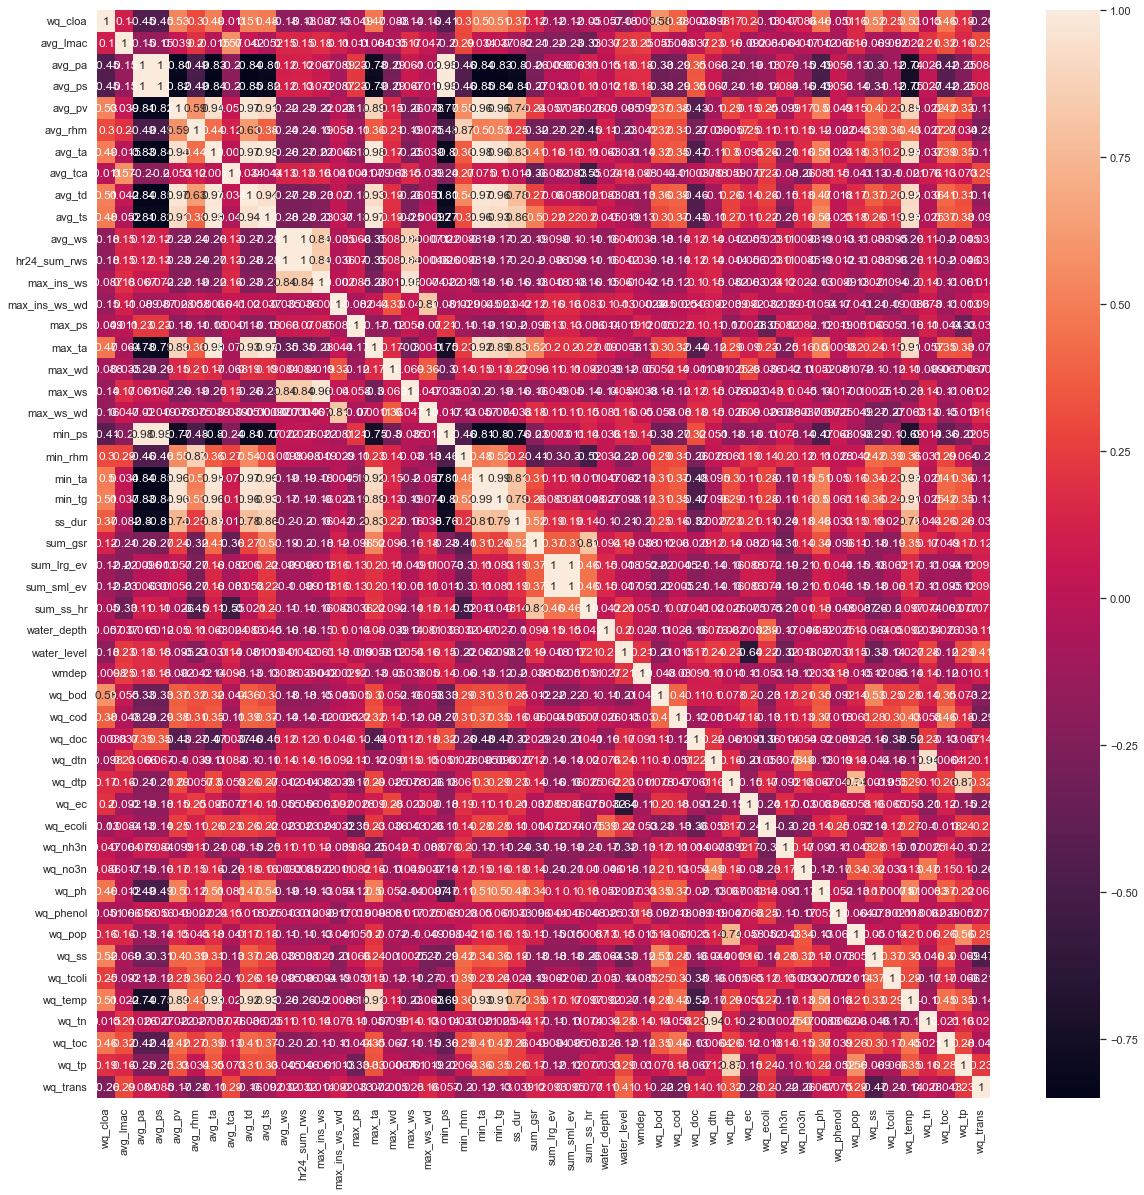

In [26]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(monthly_data.corr(), annot= True)


<AxesSubplot:ylabel='wq_cloa'>

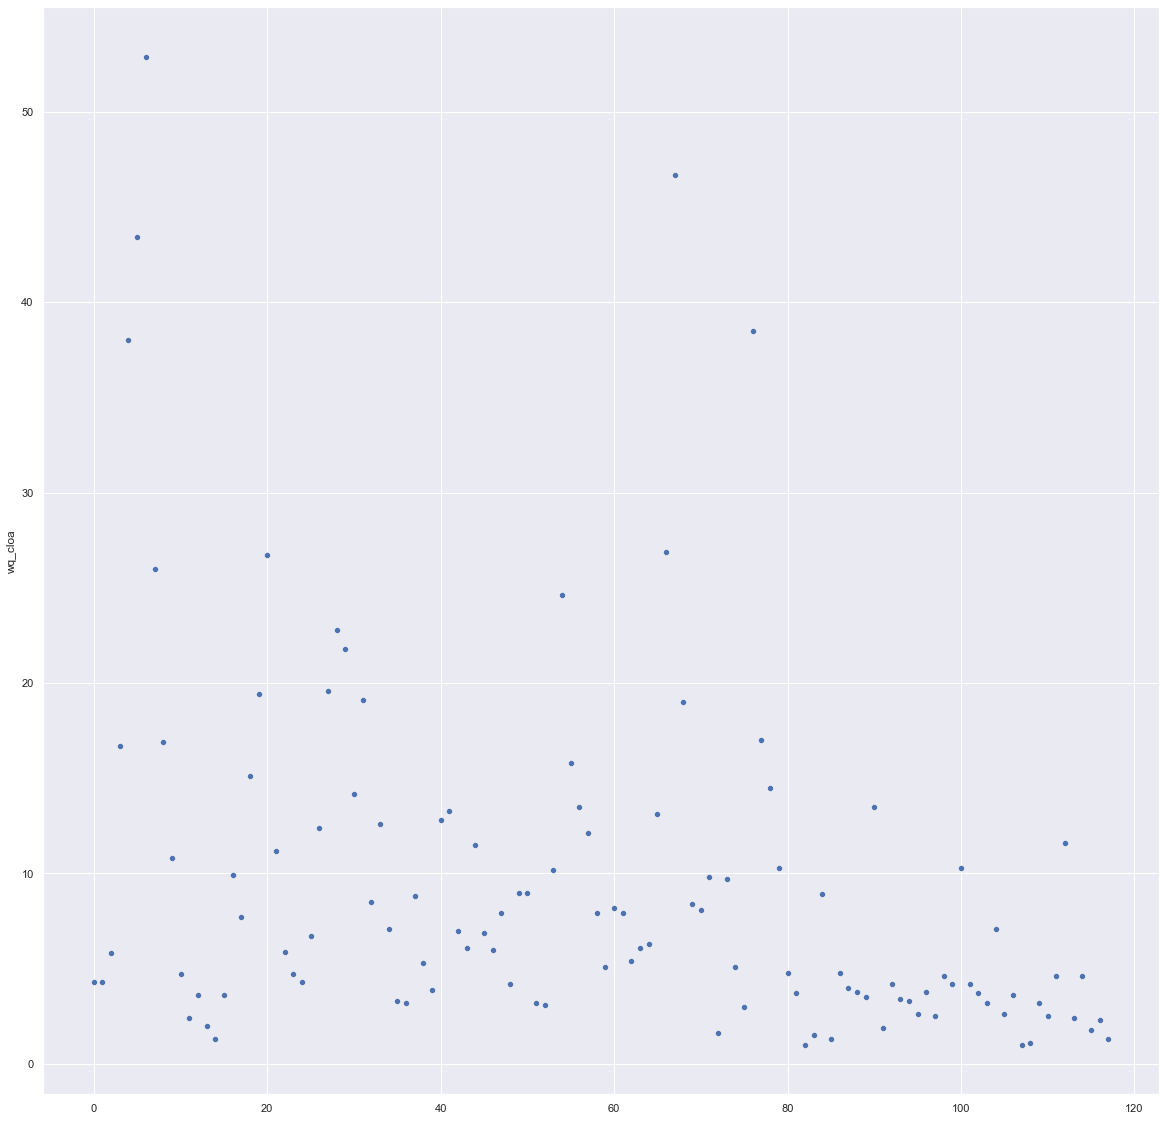

In [27]:
sns.scatterplot(monthly_data['wq_cloa'])

In [65]:
weekly_data['time'] = pd.to_datetime(weekly_data['time'], utc=False)
monthly_data['time'] = pd.to_datetime(monthly_data['time'], utc=False)

In [66]:
weekly_data.set_index('time', inplace=True)
monthly_data.set_index('time', inplace=True)

In [85]:
weekly_data

,time,min_ps,avg_rhm,avg_ts,avg_pv,sum_ss_hr,ss_dur,avg_ps,sum_sml_ev,avg_tca,...,wq_pop,wq_dtn,wq_dtp,wq_toc,water_depth,wq_cloa,day,month,year,label
0,2012-01-08,1025.0,76.8,-0.8,4.3,1.8,9.8,1026.8,1.4,7.8,...,0.003,0.974,0.012,2.7,1,4.3,8,1,2012,NaN
1,2012-01-15,1007.7,96.3,7.3,9.6,0.0,11.6,1010.4,1.4,10.0,...,0.000,1.267,0.004,2.7,1,4.3,15,1,2012,NaN
2,2012-01-22,1007.7,96.3,7.3,9.6,0.0,11.6,1010.4,1.4,10.0,...,0.000,1.267,0.004,2.7,1,4.3,22,1,2012,NaN
3,2012-01-29,1007.7,96.3,7.3,9.6,0.0,11.6,1010.4,1.4,10.0,...,0.000,1.267,0.004,2.7,1,4.3,29,1,2012,NaN
4,2012-02-05,1007.7,96.3,7.3,9.6,0.0,11.6,1010.4,1.4,10.0,...,0.000,1.267,0.004,2.7,1,4.3,5,2,2012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2022-01-16,1026.4,52.1,-0.3,2.8,0.7,10.7,1028.9,1.7,8.0,...,0.003,1.254,0.020,1.9,1,1.3,16,1,2022,4.6
524,2022-01-23,1026.4,52.1,-0.3,2.8,0.7,10.7,1028.9,1.7,8.0,...,0.003,1.254,0.020,1.9,1,1.3,23,1,2022,4.6
525,2022-01-30,1026.4,52.1,-0.3,2.8,0.7,10.7,1028.9,1.7,8.0,...,0.003,1.254,0.020,1.9,1,1.3,30,1,2022,4.6
526,2022-02-06,1026.4,52.1,-0.3,2.8,0.7,10.7,1028.9,1.7,8.0,...,0.003,1.254,0.020,1.9,1,1.3,6,2,2022,1.8


In [67]:
weekly_data = weekly_data.fillna(method="ffill").fillna(method="bfill")
monthly_data = monthly_data.fillna(method="ffill").fillna(method="bfill")

In [68]:
feature = ['min_ps', 'avg_rhm', 'avg_ts', 'avg_pv', 'sum_ss_hr', 'ss_dur',
    'avg_ps', 'sum_sml_ev', 'avg_tca', 'avg_td', 'avg_ta', 'hr24_sum_rws',
    'sum_gsr', 'avg_pa', 'avg_ws', 'sum_lrg_ev', 'avg_lmac',
    'water_level', 'water_depth', 'wq_temp', 'wq_ph', 'wq_doc', 'wq_bod',
    'wq_cod', 'wq_ss', 'wq_tcoli', 'wq_tn', 'wq_tp', 'wq_trans',
    'wq_phenol', 'wq_ec', 'wq_no3n', 'wq_nh3n', 'wq_ecoli', 'wq_pop',
    'wq_dtn', 'wq_dtp', 'wq_toc', 'water_depth']

target = 'wq_cloa'

In [69]:
weekly_data = weekly_data[feature+[target]]
monthly_data = monthly_data[feature+[target]]
"""
sum_rn feature 누락
"""

'\nsum_rn feature 누락\n'

In [70]:
weekly_data['day'] = weekly_data.index.day
weekly_data['month'] = weekly_data.index.month
weekly_data['year'] = weekly_data.index.year
monthly_data['day'] = monthly_data.index.day
monthly_data['month'] = monthly_data.index.month
monthly_data['year'] = monthly_data.index.year

In [72]:
feature += ['day', 'month', 'year']

In [74]:
# 데이터 스플릿
weekly_window_size = 12
monthly_window_size = 4


weekly_data['label'] = weekly_data[target].shift(periods=weekly_window_size)
monthly_data['label'] = monthly_data[target].shift(periods=monthly_window_size)


train_ratio = 0.9
cut_point = int(len(weekly_data)*train_ratio)

weekly_data.reset_index(inplace=True)
monthly_data.reset_index(inplace=True)


In [81]:
# 데이터 스플릿
print("\n\n****** Weekly model Train ******")

weekly_scale = MinMaxScaler()
weekly_scale.fit(weekly_data.loc[:cut_point, feature])
joblib.dump(weekly_scale, './model/weekly_scaler.pkl')

weekly_x = []
weekly_y = []

for i in range(len(weekly_data)):

    if (i+weekly_window_size) < len(weekly_data):
        weekly_x.append(np.array(weekly_scale.transform(weekly_data.iloc[i:i+weekly_window_size,][feature])))
        weekly_y.append(np.array(weekly_data.iloc[i+weekly_window_size,-1].astype(float)))

weekly_x = np.array(weekly_x)
weekly_y = np.array(weekly_y)

weekly_train_x = weekly_x[:cut_point, ]
weekly_test_x = weekly_x[cut_point:, ]
weekly_train_y = weekly_y[:cut_point, ]
weekly_test_y = weekly_y[cut_point:, ]



****** Weekly model Train ******


In [82]:
# 모델구축, 학습
### weekly model
weekly_model = Sequential()
weekly_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=[weekly_train_x.shape[1], weekly_train_x.shape[2]]))
weekly_model.add(Dropout(0.1))
weekly_model.add(LSTM(100, activation='relu'))
weekly_model.add(Dropout(0.4))
weekly_model.add(Dense(1))

weekly_model.compile(loss='mse', optimizer=tf.optimizers.Adam(learning_rate=0.02),metrics=['mae'])
weekly_model.fit(weekly_train_x, weekly_train_y, epochs=100, batch_size=32, validation_data=[weekly_test_x, weekly_test_y])

train_result = weekly_model.evaluate(weekly_train_x, weekly_train_y)
print("\n=======Weekly Train result=======")
print("- MSE :", train_result[0])
print("- MAE :", train_result[1])

test_result = weekly_model.evaluate(weekly_test_x, weekly_test_y)
print("\n=======Weekly Test result=======")
print("- MSE :", test_result[0])
print("- MAE :", test_result[1])

weekly_model.save("./model/weekly_model.h5")

Epoch 1/100
15/15 [==============================] - 2s 29ms/step - loss: 140622.0156 - mae: 100.0491 - val_loss: 12.4167 - val_mae: 3.1590
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 109.8291 - mae: 6.9402 - val_loss: 100.1468 - val_mae: 9.5697
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 104.1492 - mae: 6.6434 - val_loss: 69.4247 - val_mae: 7.9168
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 95.5577 - mae: 6.3649 - val_loss: 25.3785 - val_mae: 4.6338
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 60.0076 - mae: 5.2243 - val_loss: 24.8298 - val_mae: 4.0036
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 58.2980 - mae: 5.1991 - val_loss: 10.8804 - val_mae: 2.3858
Epoch 7/100
15/15 [==============================] - 0s 11ms/step - loss: 58.6140 - mae: 5.2047 - val_loss: 17.5351 - val_mae: 3.3237
Epoch 8/100
15/15 [==============================] - 

Epoch 62/100
15/15 [==============================] - 0s 10ms/step - loss: 29.1944 - mae: 3.4816 - val_loss: 9.0369 - val_mae: 2.4508
Epoch 63/100
15/15 [==============================] - 0s 11ms/step - loss: 38.6142 - mae: 3.9116 - val_loss: 10.0767 - val_mae: 2.5078
Epoch 64/100
15/15 [==============================] - 0s 10ms/step - loss: 25.4406 - mae: 3.5265 - val_loss: 9.7846 - val_mae: 2.3945
Epoch 65/100
15/15 [==============================] - 0s 11ms/step - loss: 26.8643 - mae: 3.4384 - val_loss: 8.6917 - val_mae: 2.3252
Epoch 66/100
15/15 [==============================] - 0s 10ms/step - loss: 26.9768 - mae: 3.5707 - val_loss: 10.9315 - val_mae: 2.4543
Epoch 67/100
15/15 [==============================] - 0s 11ms/step - loss: 33.1459 - mae: 3.7577 - val_loss: 9.9884 - val_mae: 2.5000
Epoch 68/100
15/15 [==============================] - 0s 12ms/step - loss: 24.7852 - mae: 3.4679 - val_loss: 9.4127 - val_mae: 2.8000
Epoch 69/100
15/15 [==============================] - 0s 11m

In [83]:
### monthly model

print("\n\n****** Monthly model Train ******")

cut_point = int(len(monthly_data) * train_ratio)
monthly_scale = MinMaxScaler()
monthly_scale.fit(monthly_data.loc[:cut_point, feature])
joblib.dump(monthly_scale, './model/monthly_scaler.pkl')

monthly_x = []
monthly_y = []

for i in range(len(monthly_data)):
    if (i+monthly_window_size) < len(monthly_data):
        monthly_x.append(np.array(monthly_scale.transform(monthly_data.iloc[i:i+monthly_window_size, ][feature])))
        monthly_y.append(np.array(monthly_data.iloc[i+monthly_window_size, -1].astype(float)))

monthly_x = np.array(monthly_x)
monthly_y = np.array(monthly_y)

monthly_train_x = monthly_x[:cut_point, ]
monthly_test_x = monthly_x[cut_point:, ]
monthly_train_y = monthly_y[:cut_point, ]
monthly_test_y = monthly_y[cut_point:, ]

monthly_model = Sequential()
monthly_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=[monthly_train_x.shape[1], monthly_train_x.shape[2]]))
monthly_model.add(Dropout(0.1))
monthly_model.add(LSTM(100, activation='relu'))
monthly_model.add(Dropout(0.4))
monthly_model.add(Dense(1))

monthly_model.compile(loss='mse', optimizer=tf.optimizers.Adam(learning_rate=0.02), metrics=['mae'])
monthly_model.fit(monthly_train_x, monthly_train_y, epochs=100, batch_size=32, validation_data=[monthly_test_x, monthly_test_y])

train_result = monthly_model.evaluate(monthly_train_x, monthly_train_y)
print("\n=======Monthly Train result=======")
print("- MSE :", train_result[0])
print("- MAE :", train_result[1])

test_result = monthly_model.evaluate(monthly_test_x, monthly_test_y)
print("\n=======Monthly Test result=======")
print("- MSE :", test_result[0])
print("- MAE :", test_result[1])

monthly_model.save("./model/monthly_model.h5")

print("\n\n** two model saved at model dir! **\n\n")



****** Monthly model Train ******
Epoch 1/100
4/4 [==============================] - 2s 169ms/step - loss: 7141.9888 - mae: 49.3125 - val_loss: 19.0819 - val_mae: 2.9938
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 191.7560 - mae: 9.8857 - val_loss: 23.9155 - val_mae: 3.7216
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 196.3565 - mae: 10.1151 - val_loss: 22.3660 - val_mae: 3.5198
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 187.1837 - mae: 9.7080 - val_loss: 10.9201 - val_mae: 1.9667
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 125.2821 - mae: 7.7058 - val_loss: 82.6531 - val_mae: 8.4962
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 94.9916 - mae: 6.7959 - val_loss: 8.5503 - val_mae: 2.6415
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 118.4878 - mae: 6.7019 - val_loss: 8.4846 - val_mae: 2.6660
Epoch 8/100
4/4 [=====================

In [87]:
# RandomForest, XGBoost, LSTM
# 상관관계
# 데이터 시각화
# 시간, target
# 상관관계가 높은 특성, target